In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('F:\\Muthu_2023\\Personal\\NextStep\\PdM\\Predictive-Maintenance\\Datasets\\train_FD001.csv')

In [3]:
raw_data.describe(include='all').T

count         mean           std        min        25%  \
Engine            20631.0    51.506568  2.922763e+01     1.0000    26.0000   
Cycles            20631.0   108.807862  6.888099e+01     1.0000    52.0000   
Sensor1           20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015   
Sensor2           20631.0     0.000002  2.930621e-04    -0.0006    -0.0002   
Sensor3           20631.0   100.000000  0.000000e+00   100.0000   100.0000   
Sensor4           20631.0   518.670000  6.537152e-11   518.6700   518.6700   
Sensor5           20631.0   642.680934  5.000533e-01   641.2100   642.3250   
Sensor6           20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600   
Sensor7           20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600   
Sensor8           20631.0    14.620000  3.394700e-12    14.6200    14.6200   
Sensor9           20631.0    21.609803  1.388985e-03    21.6000    21.6100   
Sensor10          20631.0   553.367711  8.850923e-01   549.8500   552.8100   
Sensor11          20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500   
Sensor12          20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000   
Sensor13          20631.0     1.300000  4.660829e-13     1.3000     1.3000   
Sensor14          20631.0    47.541168  2.670874e-01    46.8500    47.3500   
Sensor15          20631.0   521.413470  7.375534e-01   518.6900   520.9600   
Sensor16          20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400   
Sensor17          20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450   
Sensor18          20631.0     8.442146  3.750504e-02     8.3249     8.4149   
Sensor19          20631.0     0.030000  1.556432e-14     0.0300     0.0300   
Sensor20          20631.0   393.210654  1.548763e+00   388.0000   392.0000   
Sensor21          20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000   
Sensor22          20631.0   100.000000  0.000000e+00   100.0000   100.0000   
Sensor23          20631.0    38.816271  1.807464e-01    38.1400    38.7000   
Sensor24          20631.0    23.289705  1.082509e-01    22.8942    23.2218   
Remaining Cycles  20631.0   107.807862  6.888099e+01     0.0000    51.0000   

                        50%        75%        max  
Engine              52.0000    77.0000   100.0000  
Cycles             104.0000   156.0000   362.0000  
Sensor1              0.0000     0.0015     0.0087  
Sensor2              0.0000     0.0003     0.0006  
Sensor3            100.0000   100.0000   100.0000  
Sensor4            518.6700   518.6700   518.6700  
Sensor5            642.6400   643.0000   644.5300  
Sensor6           1590.1000  1594.3800  1616.9100  
Sensor7           1408.0400  1414.5550  1441.4900  
Sensor8             14.6200    14.6200    14.6200  
Sensor9             21.6100    21.6100    21.6100  
Sensor10           553.4400   554.0100   556.0600  
Sensor11          2388.0900  2388.1400  2388.5600  
Sensor12          9060.6600  9069.4200  9244.5900  
Sensor13             1.3000     1.3000     1.3000  
Sensor14            47.5100    47.7000    48.5300  
Sensor15           521.4800   521.9500   523.3800  
Sensor16          2388.0900  2388.1400  2388.5600  
Sensor17          8140.5400  8148.3100  8293.7200  
Sensor18             8.4389     8.4656     8.5848  
Sensor19             0.0300     0.0300     0.0300  
Sensor20           393.0000   394.0000   400.0000  
Sensor21          2388.0000  2388.0000  2388.0000  
Sensor22           100.0000   100.0000   100.0000  
Sensor23            38.8300    38.9500    39.4300  
Sensor24            23.2979    23.3668    23.6184  
Remaining Cycles   103.0000   155.0000   361.0000

# Sensor Data
Constant: 3, 4, 8, 9, 13, 19, 21, 22
Discrete: 2, 20

In [4]:
df = raw_data.drop(['Sensor3', 'Sensor4', 'Sensor8','Sensor9', 'Sensor13', 'Sensor19', 'Sensor21', 'Sensor22'], axis=1)

In [ ]:
#Frequency Distribution
col_list = list(df.columns)
fig, ax = plt.subplots(8, 2, figsize=(12,30))
for i in range(2, len(col_list)-1, 2):
    mean=df[col_list[i]].mean()
    median=df[col_list[i]].median()
    mode=df[col_list[i]].mode().values[0]

    sns.distplot(df[col_list[i]], kde=True, ax = ax[(i//2 - 2),0])
    if i+1 < len(col_list)-1:
        mean=df[col_list[i+1]].mean()
        median=df[col_list[i+1]].median()
        mode=df[col_list[i+1]].mode().values[0]
        sns.distplot(df[col_list[i+1]], kde=True, ax = ax[(i//2 - 2),1])

In [ ]:
#Skewness
df.iloc[:, 2:-1].skew(axis=0)

In [ ]:
# df_grp = df.groupby('Engine').mean()
# df_grp.reset_index(inplace=True)
# cols = list(df_grp.columns)
# for i in range(2,len(cols)):
#     plt.figure(figsize=(12,6))
#     plt.scatter(df_grp['Engine'], df_grp.iloc[:,i])
#     plt.title(cols[i])

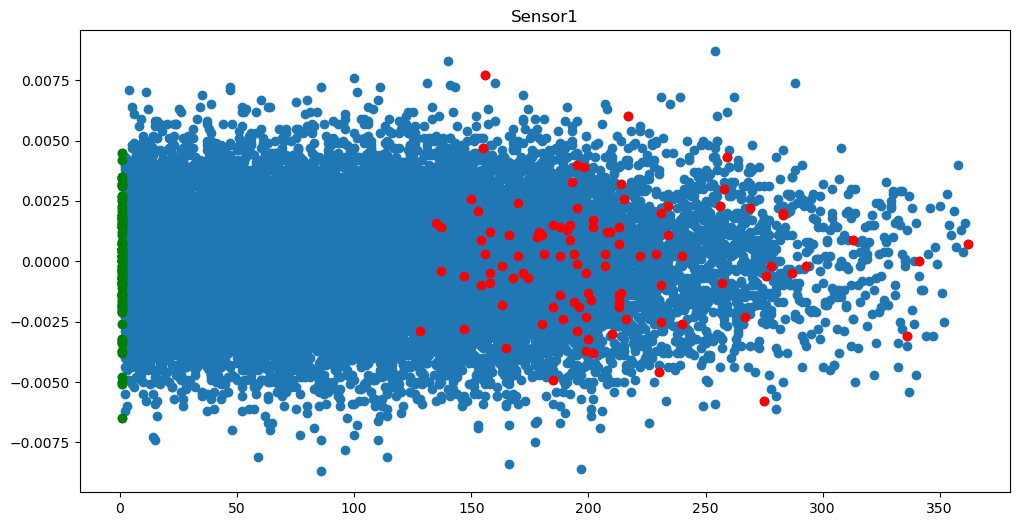

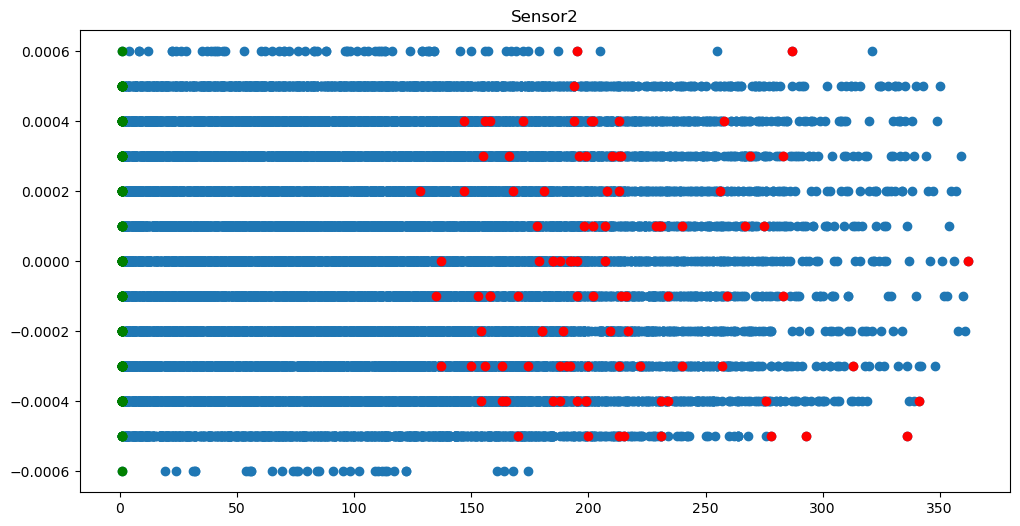

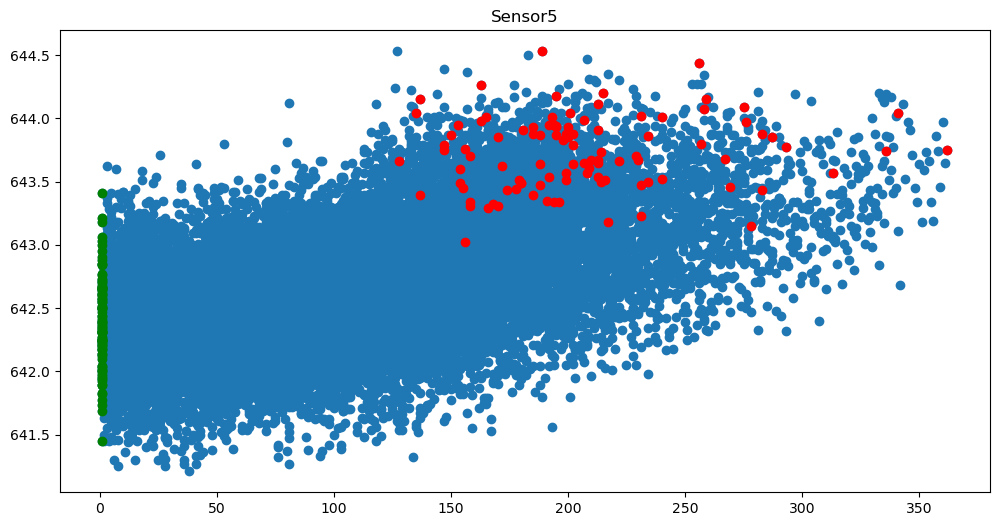

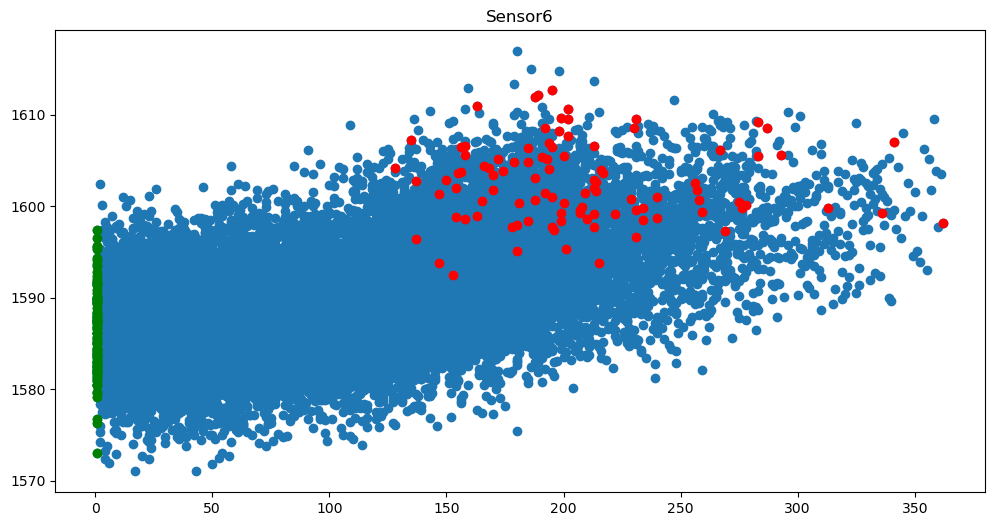

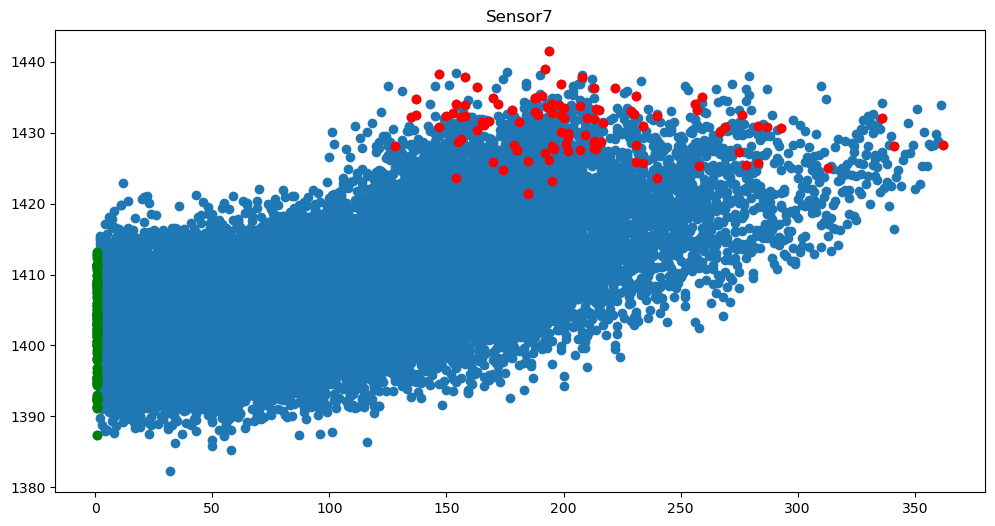

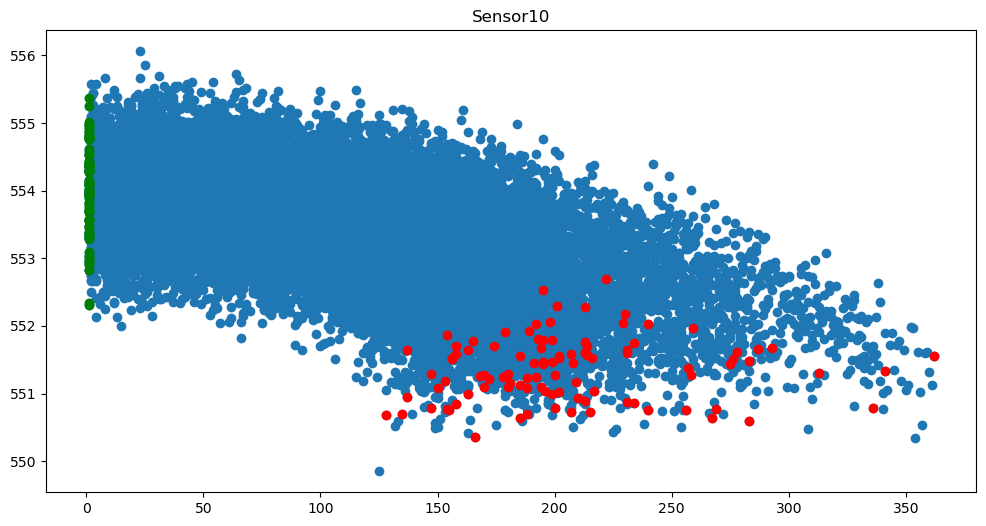

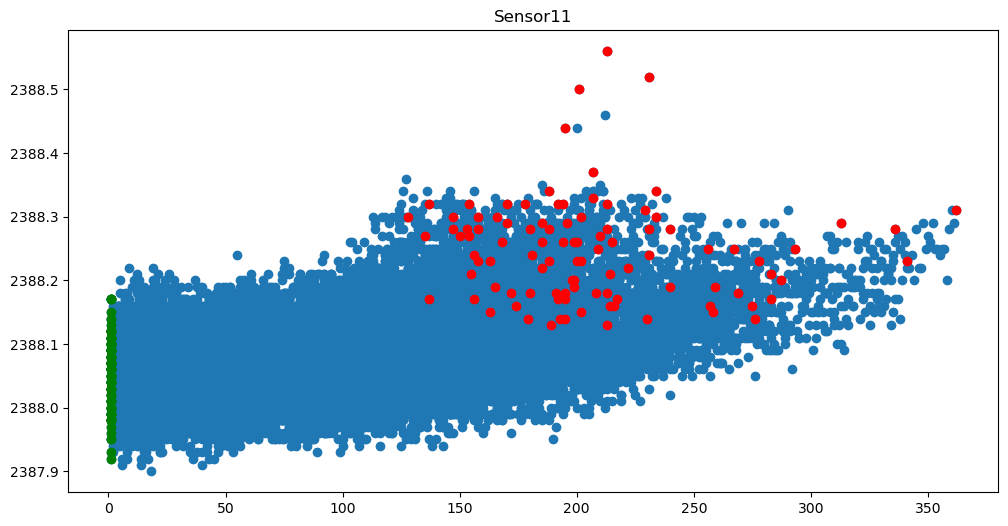

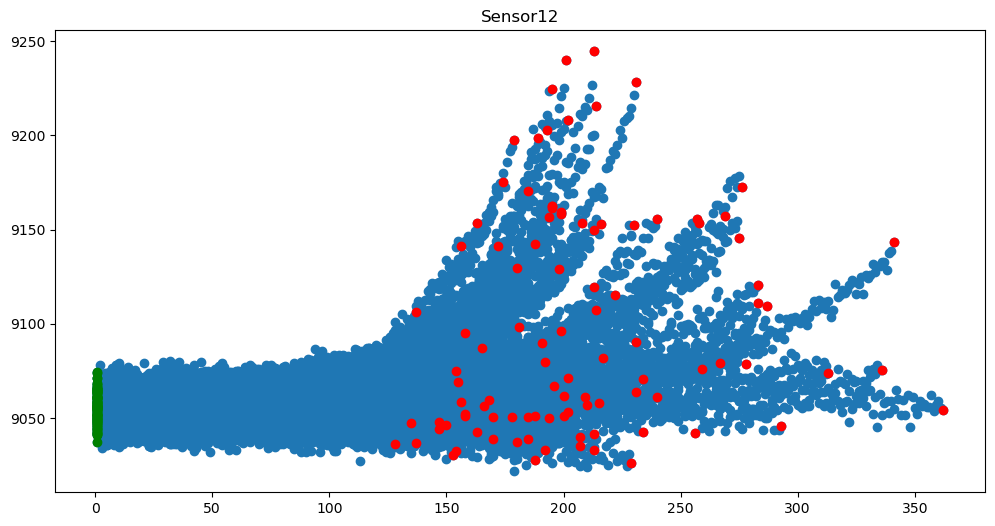

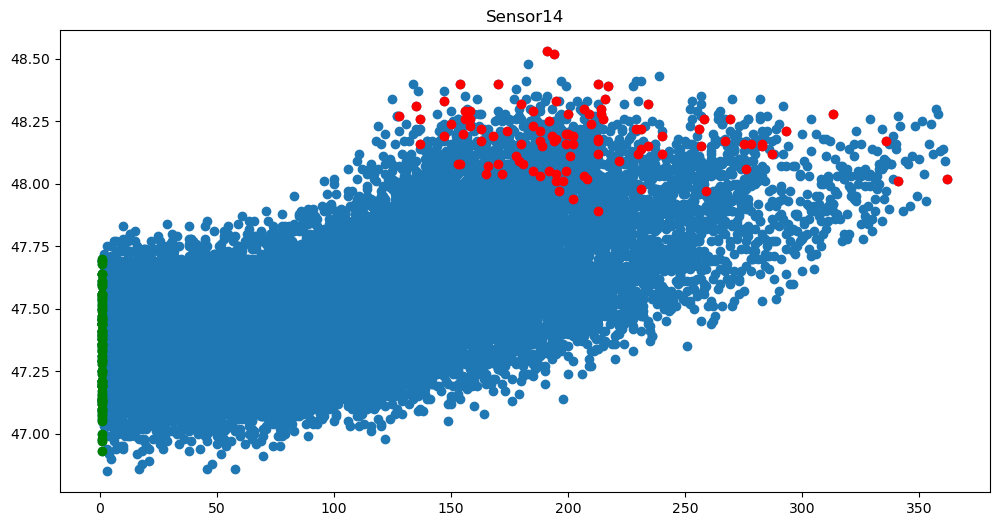

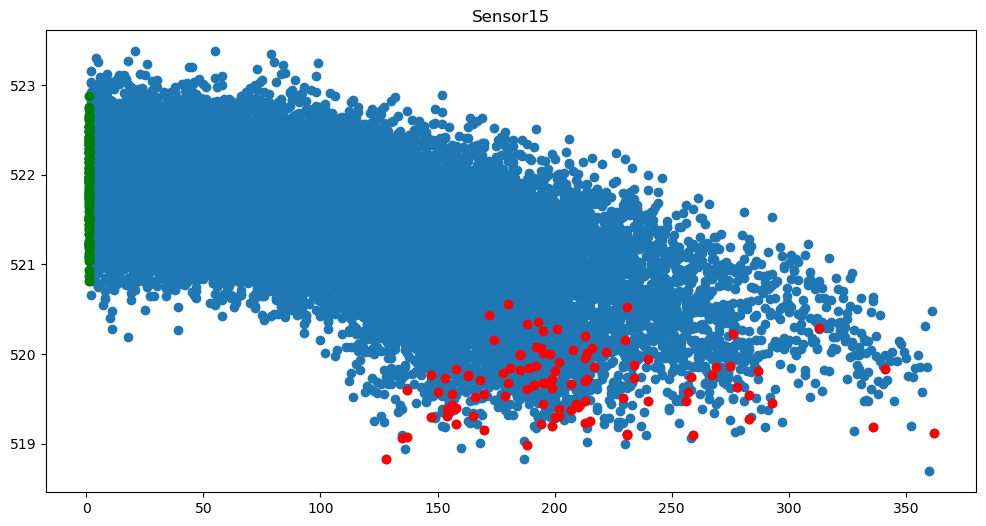

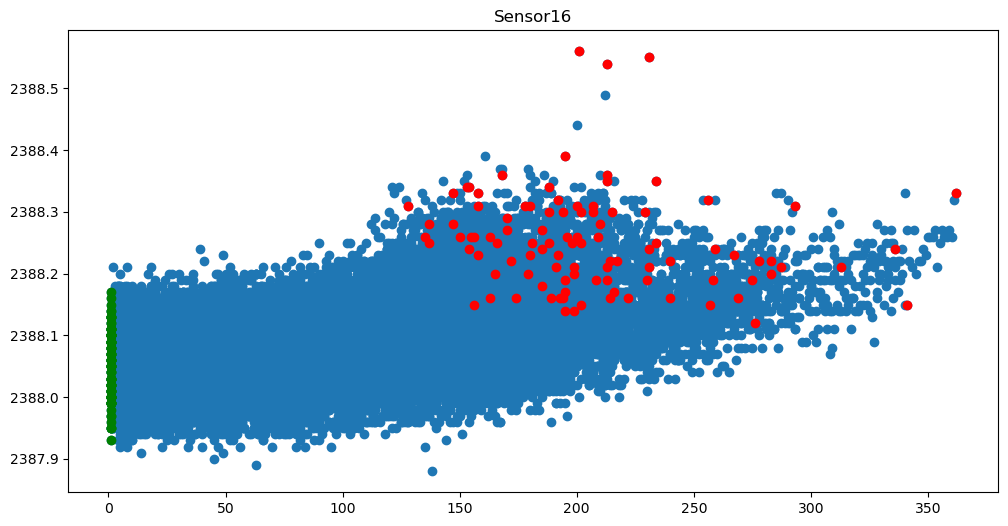

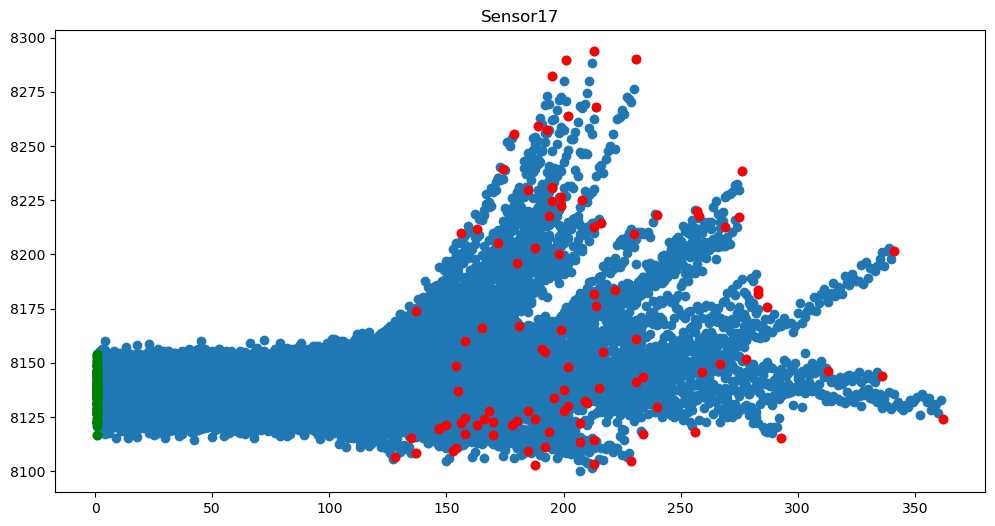

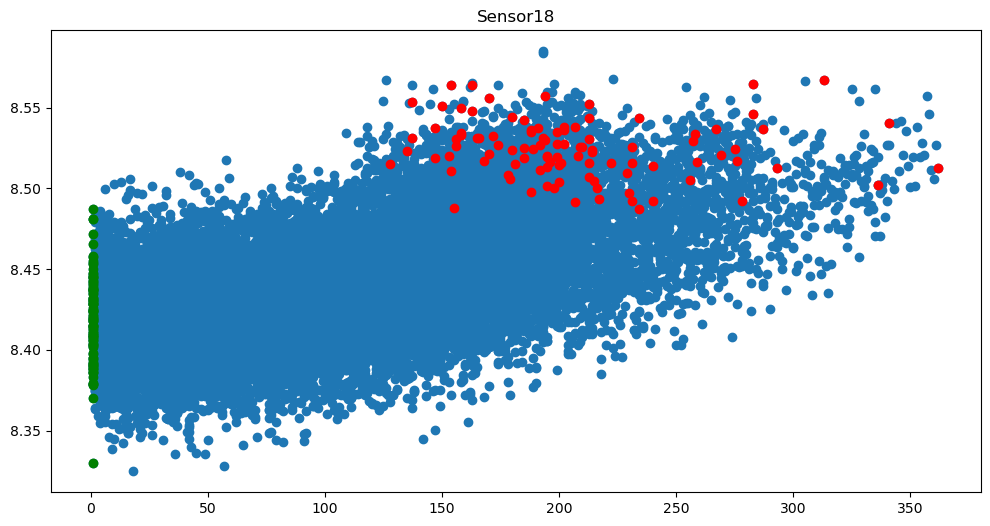

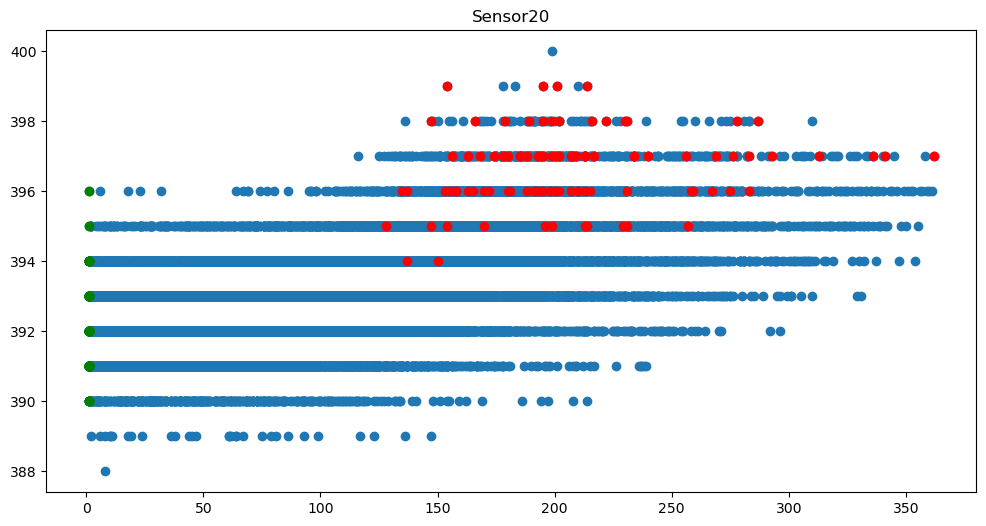

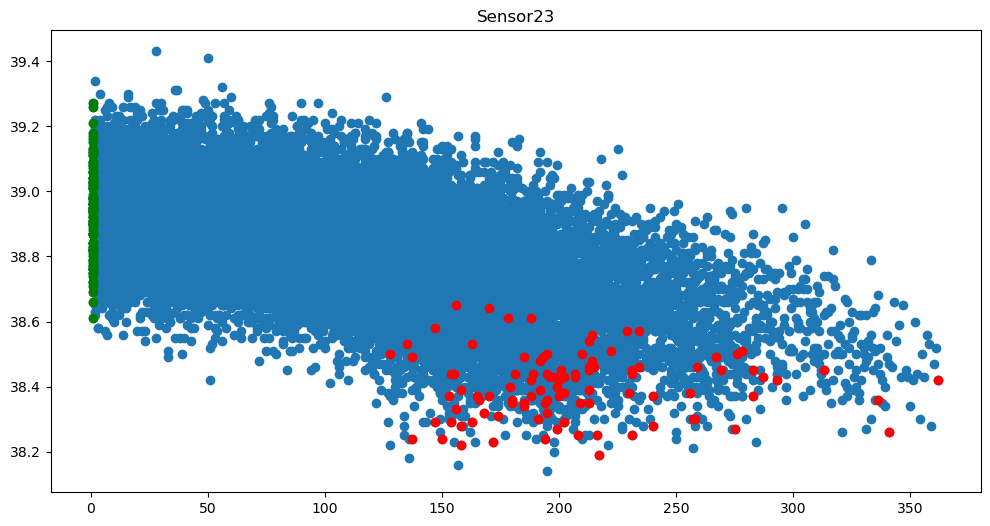

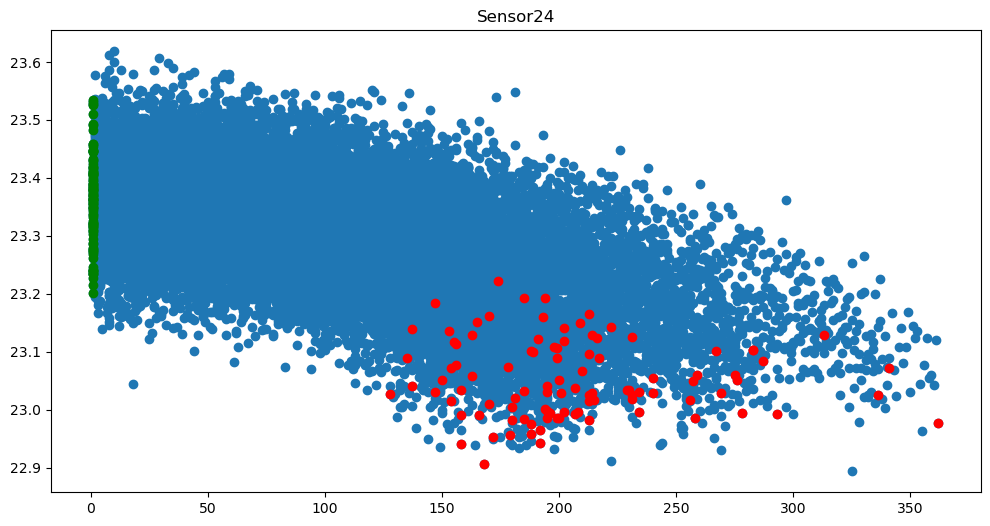

In [7]:
max_pt = list(df[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
min_pt = list(df[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

max_df = df.loc[max_pt]
min_df = df.loc[min_pt]
cols = list(df.columns)
for i in range(2,len(cols)-1):
    plt.figure(figsize=(12,6))
    plt.scatter(df['Cycles'], df.iloc[:,i])
    plt.scatter(max_df['Cycles'], max_df.iloc[:,i], color='r') #Sensor reading at max cycle of each engine
    plt.scatter(min_df['Cycles'], min_df.iloc[:,i], color='g') #Sensor reading at first cycle of each engine
    #plt.set_xlabel('Cycles')
    plt.title(cols[i])

In [134]:
from matplotlib.markers import MarkerStyle

In [159]:
test = df[['Engine', 'Cycles']].groupby('Engine').max()
test.reset_index(inplace=True)

In [160]:
test['Cycles'] = test['Cycles'] - 10
test

Engine  Cycles
0        1     182
1        2     277
2        3     169
3        4     179
4        5     259
5        6     178
6        7     249
7        8     140
8        9     191
9       10     212
10      11     230
11      12     160
12      13     153
13      14     170
14      15     197
15      16     199
16      17     266
17      18     185
18      19     148
19      20     224
20      21     185
21      22     192
22      23     158
23      24     137
24      25     220
25      26     189
26      27     146
27      28     155
28      29     153
29      30     184
30      31     224
31      32     181
32      33     190
33      34     185
34      35     171
35      36     148
36      37     160
37      38     184
38      39     118
39      40     178
40      41     206
41      42     186
42      43     197
43      44     182
44      45     148
45      46     246
46      47     204
47      48     221
48      49     205
49      50     188
50      51     203
51      52     203
52      53     185
53      54     247
54      55     183
55      56     265
56      57     127
57      58     137
58      59     221
59      60     162
60      61     175
61      62     170
62      63     164
63      64     273
64      65     143
65      66     192
66      67     303
67      68     189
68      69     352
69      70     127
70      71     198
71      72     203
72      73     203
73      74     156
74      75     219
75      76     200
76      77     144
77      78     221
78      79     189
79      80     175
80      81     230
81      82     204
82      83     283
83      84     257
84      85     178
85      86     268
86      87     168
87      88     203
88      89     207
89      90     144
90      91     125
91      92     331
92      93     145
93      94     248
94      95     273
95      96     326
96      97     192
97      98     146
98      99     175
99     100     190

In [161]:
max_10pt = list(df[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
max_10pt = [max_10pt[i] - 10 for i in range(len(max_pt))]
max_10df = df.loc[max_10pt]

cols = list(df.columns)
for i in range(2,len(cols)-3):
    plt.figure(figsize=(12,6))
    plt.scatter(df['Cycles'], df.iloc[:,i], c = df['Cycle_cat'])
    g= plt.scatter(max_df['Cycles'], max_df.iloc[:,i], c = max_df['Cycle_cat'], marker='^') #Sensor reading at max cycle of each engine
    g.set_facecolor('none')
    g.set_edgecolor('r')
    plt.title(cols[i])

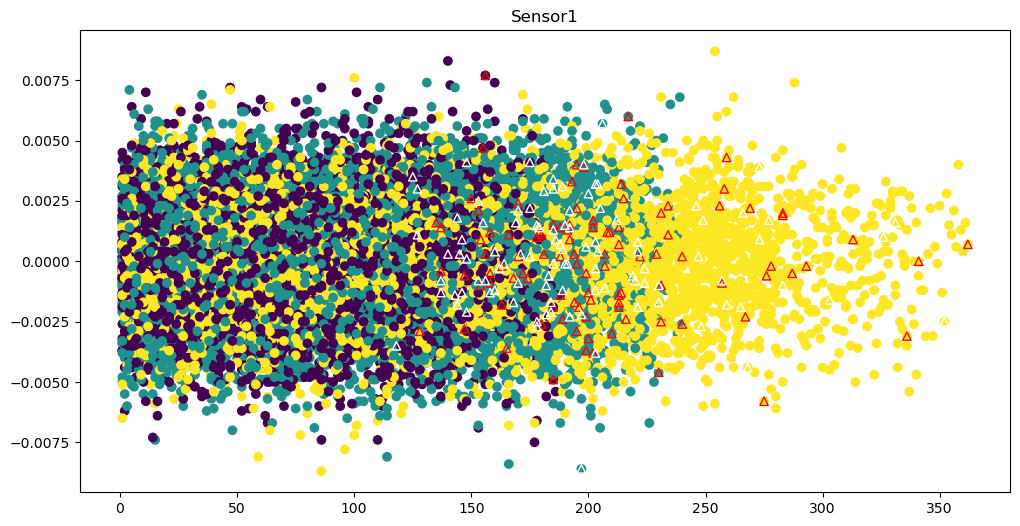

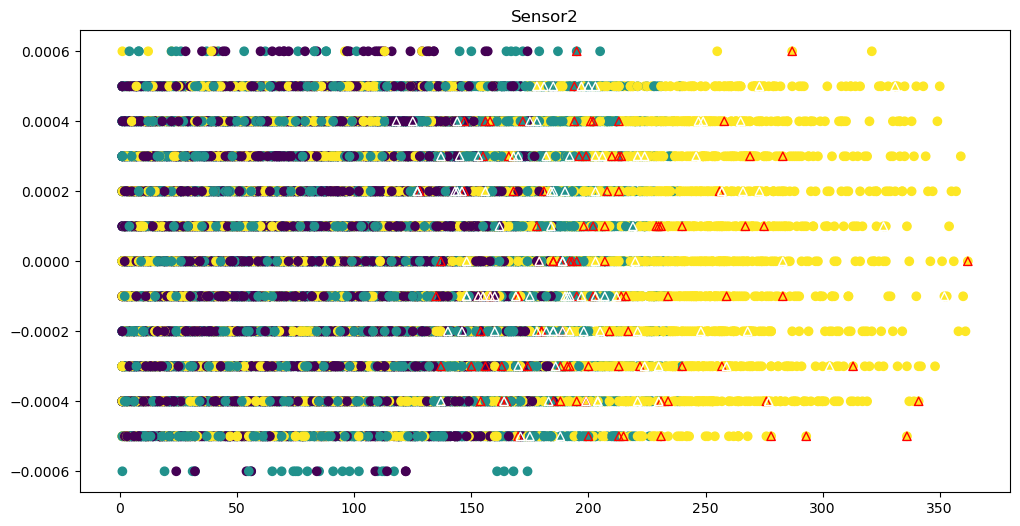

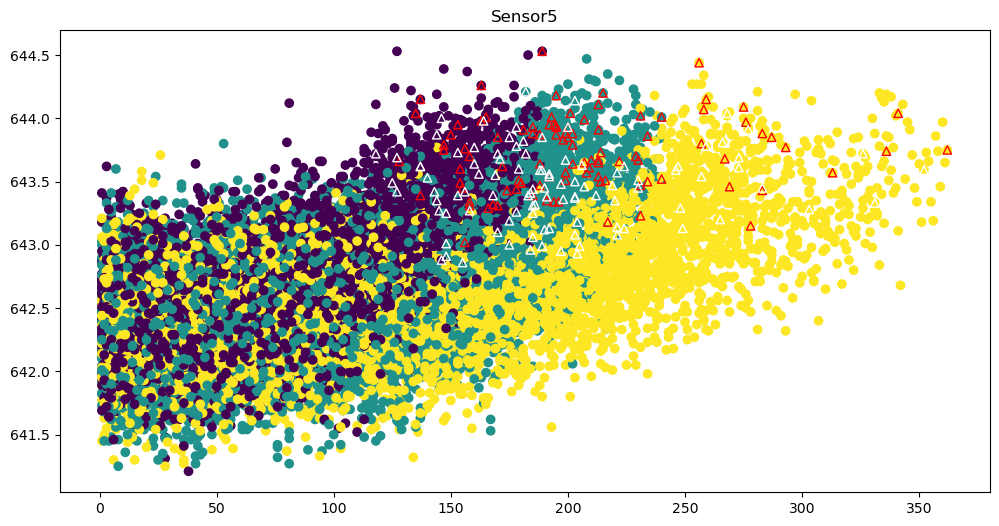

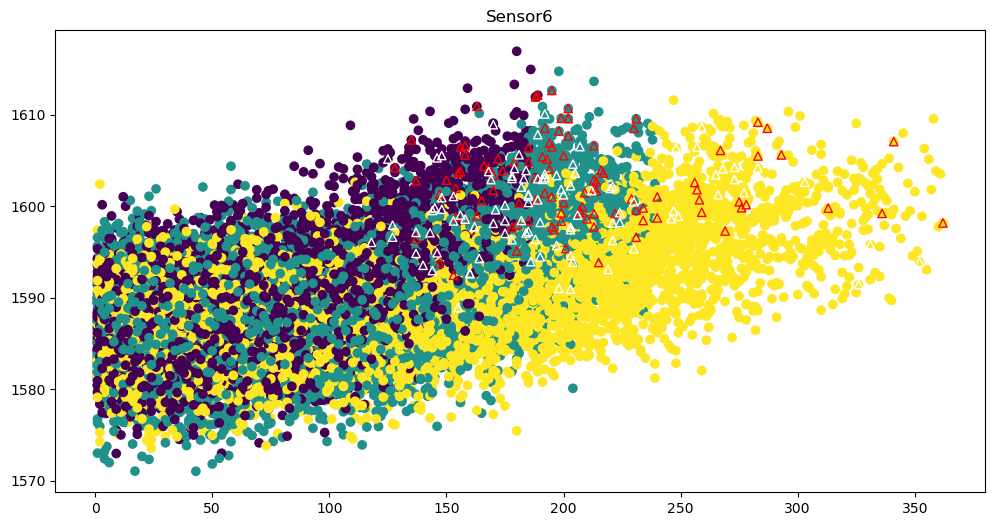

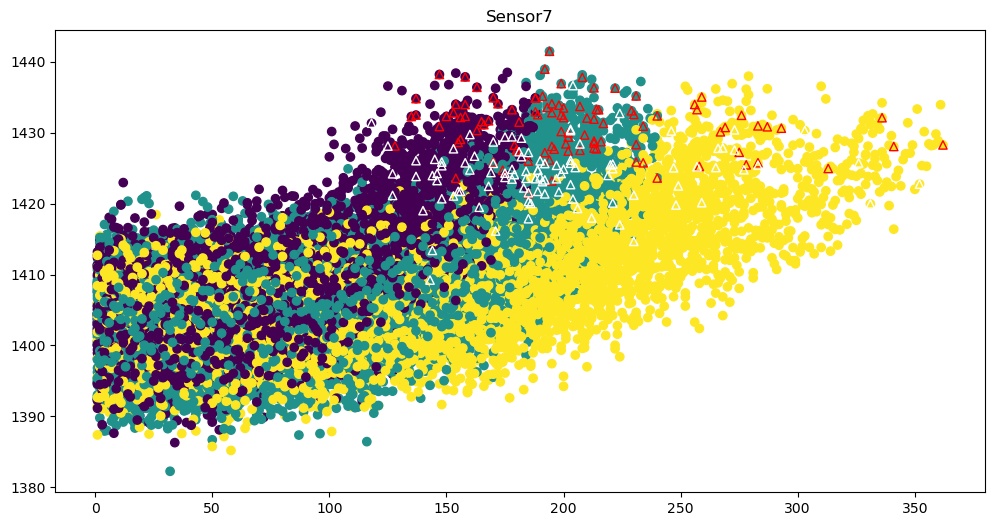

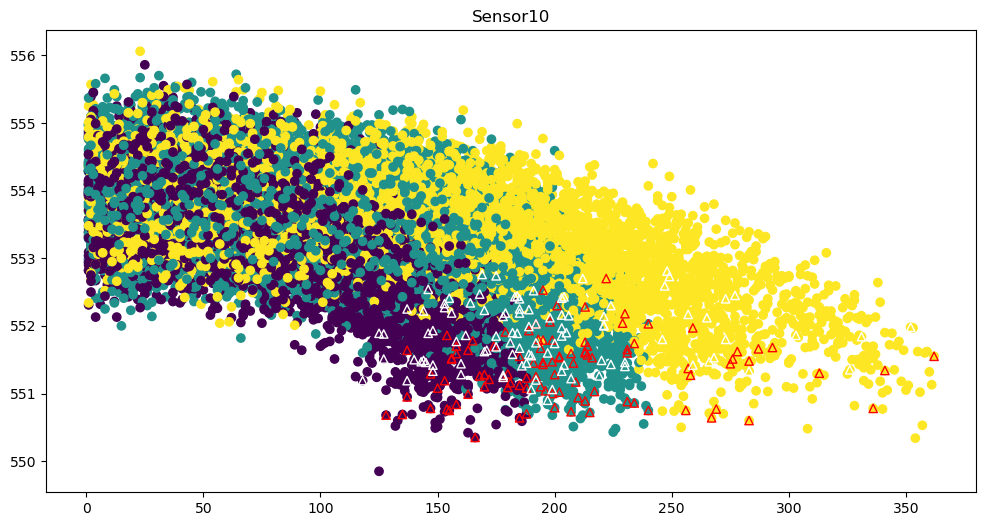

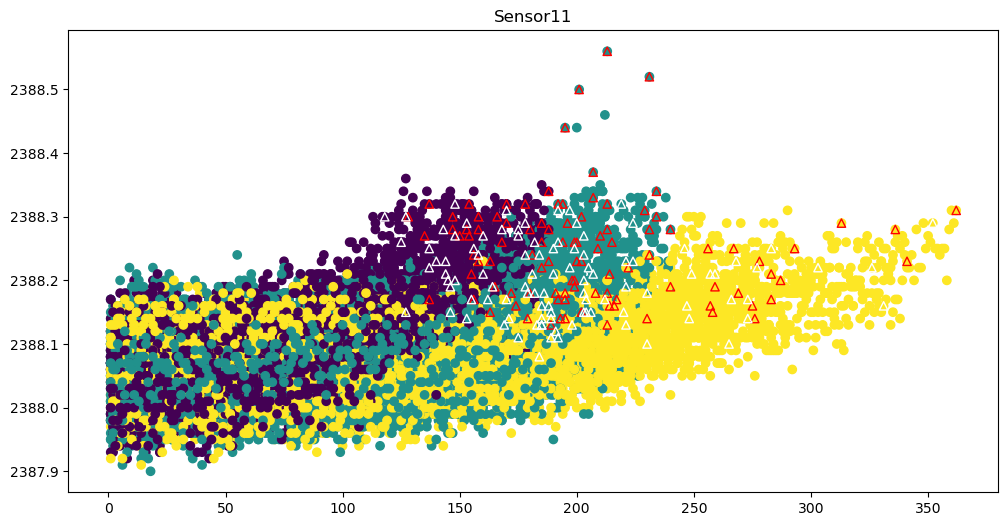

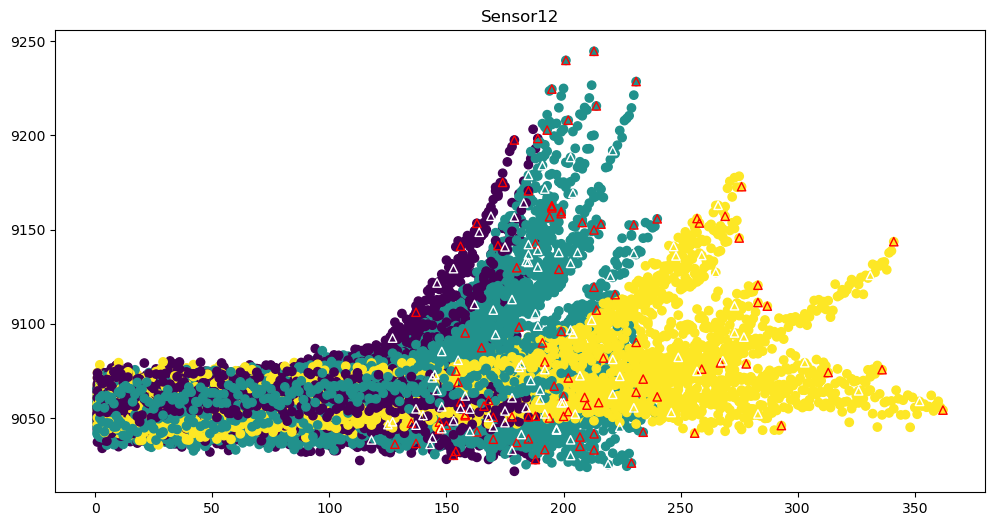

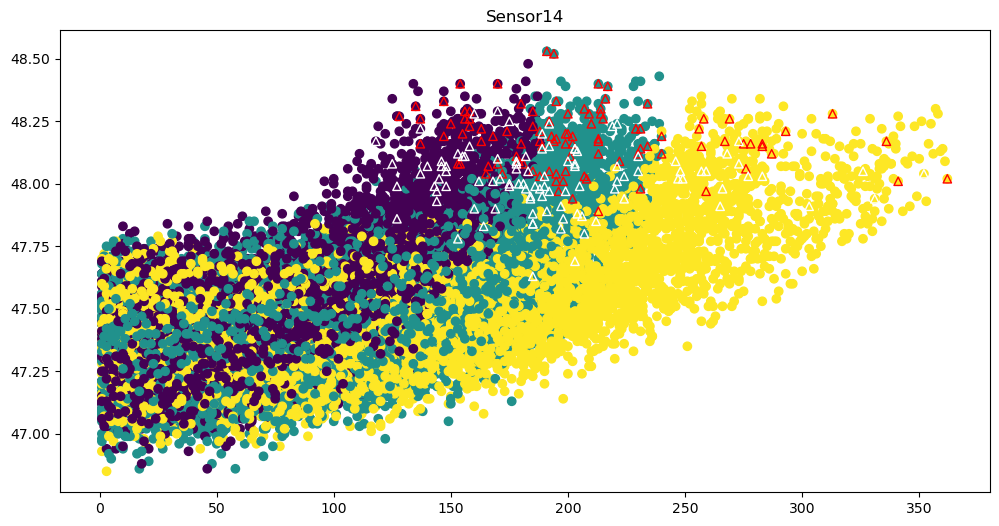

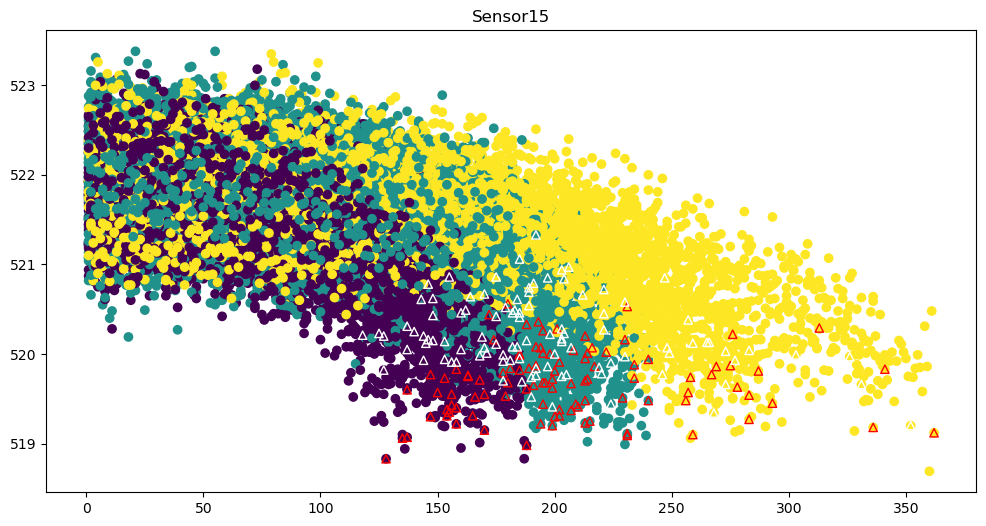

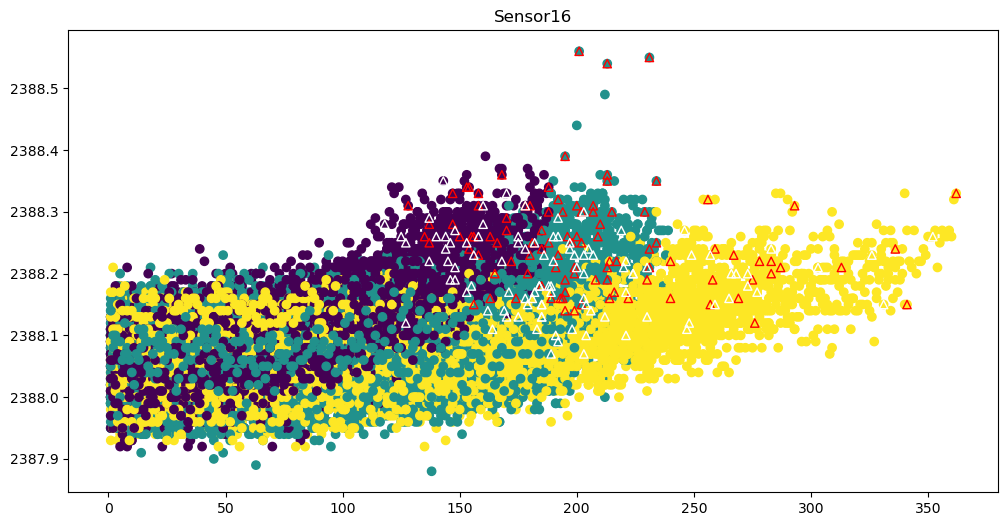

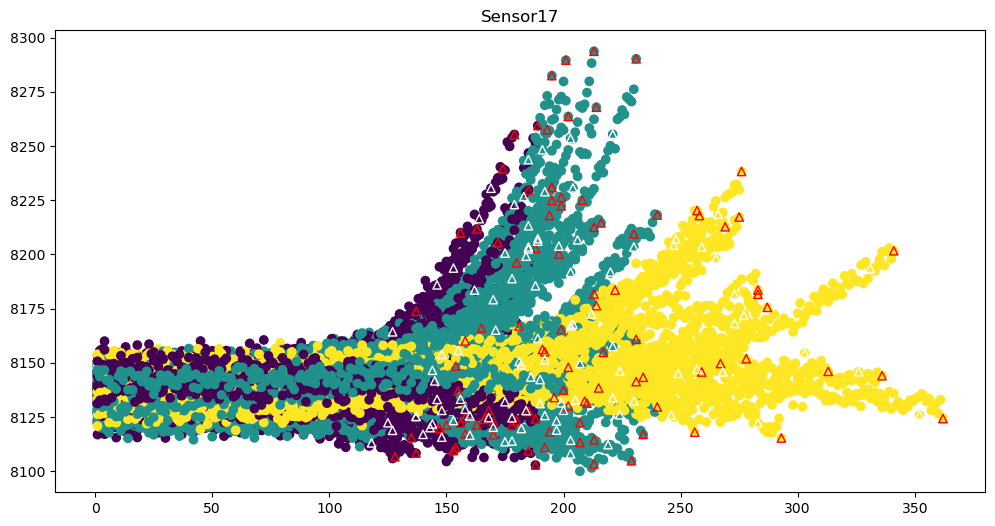

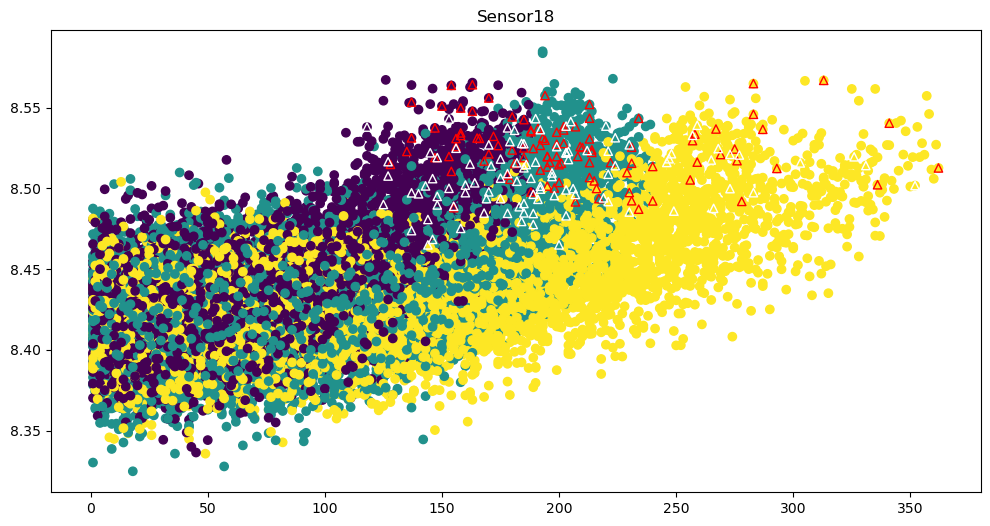

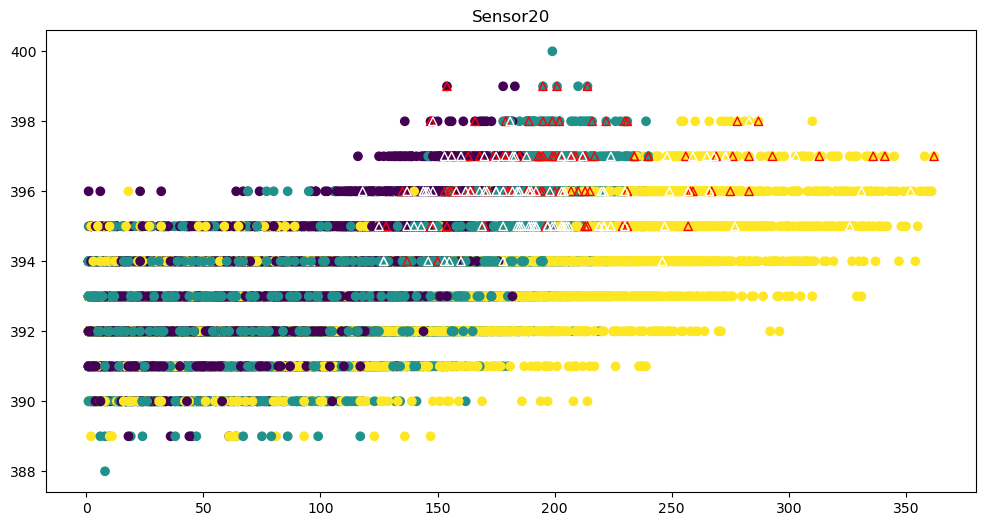

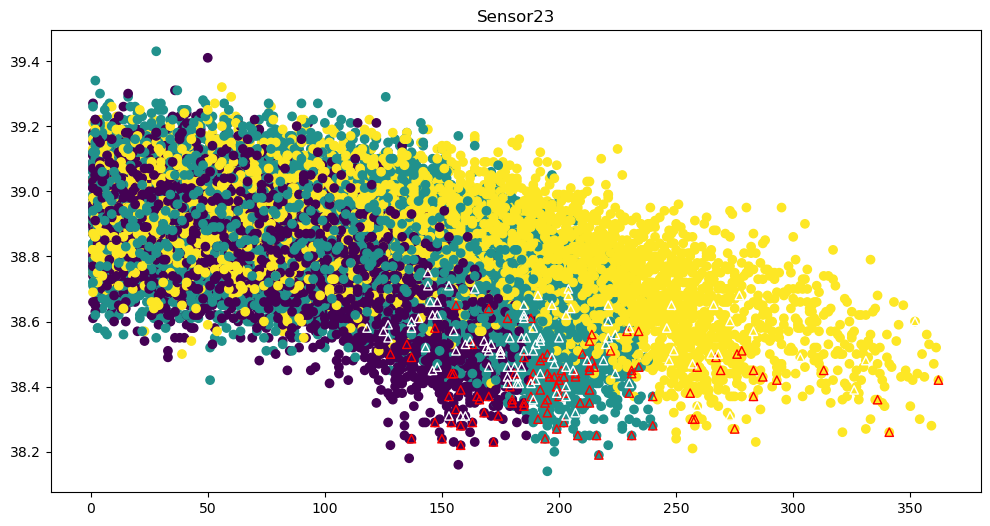

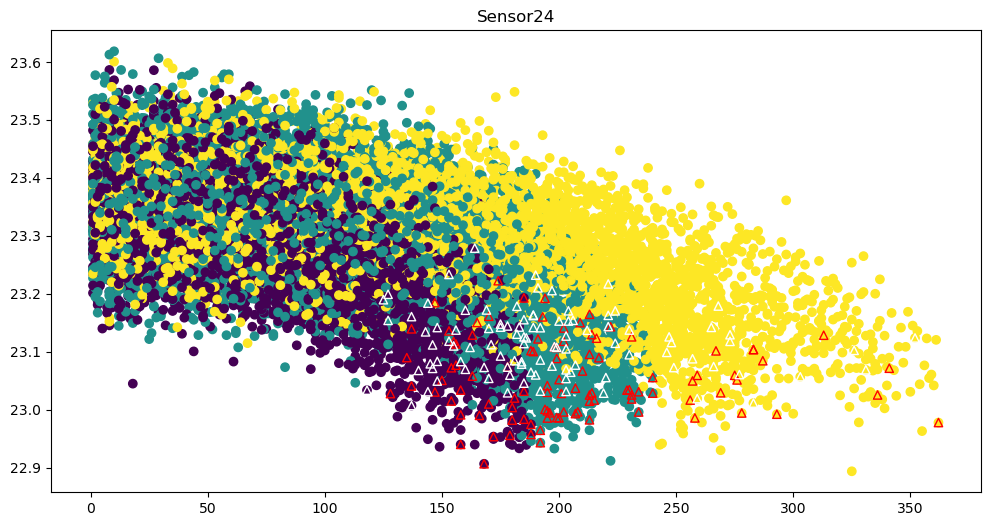

In [166]:
max_pt = list(df[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
min_pt = list(df[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])
max_10pt = [max_pt[i] - 10 for i in range(len(max_pt))]
max_10df = df.loc[max_10pt]

max_df = df.loc[max_pt]
min_df = df.loc[min_pt]
cols = list(df.columns)
for i in range(2,len(cols)-3):
    plt.figure(figsize=(12,6))
    plt.scatter(df['Cycles'], df.iloc[:,i], c = df['Cycle_cat'])
    g= plt.scatter(max_df['Cycles'], max_df.iloc[:,i], c = max_df['Cycle_cat'], marker='^') #Sensor reading at max cycle of each engine
    g.set_facecolor('none')
    g.set_edgecolor('r')
    g= plt.scatter(max_10df['Cycles'], max_10df.iloc[:,i], c = max_10df['Cycle_cat'], marker='^') #Sensor reading at max cycle of each engine
    g.set_facecolor('none')
    g.set_edgecolor('white')
    plt.title(cols[i])

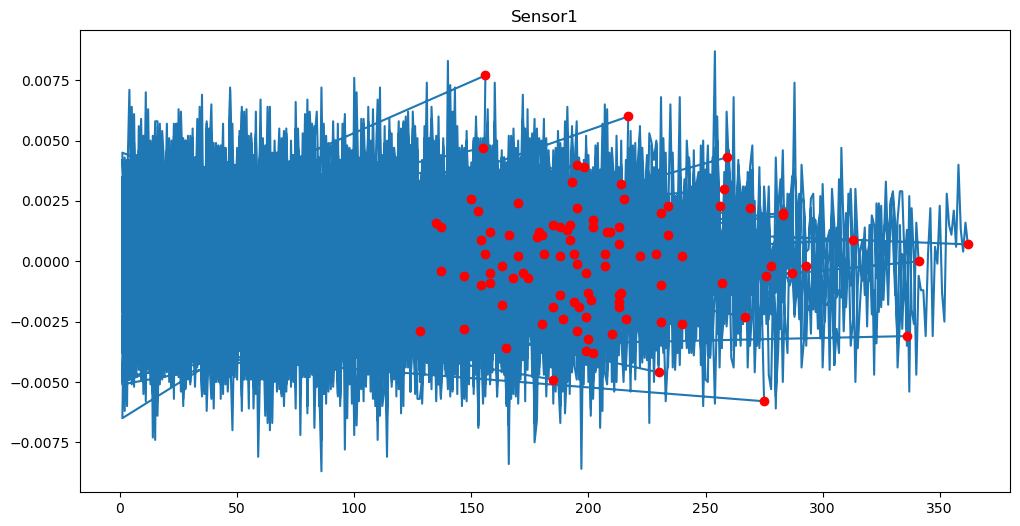

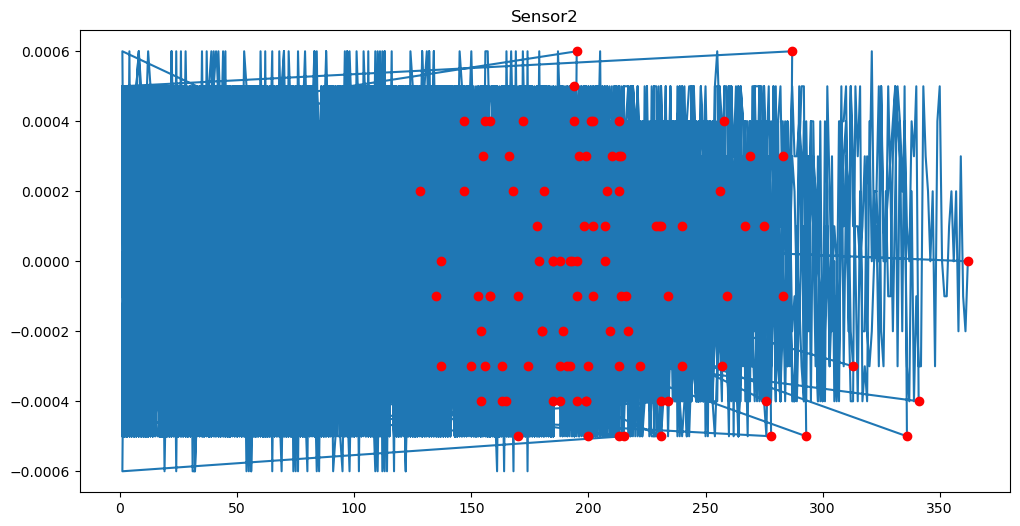

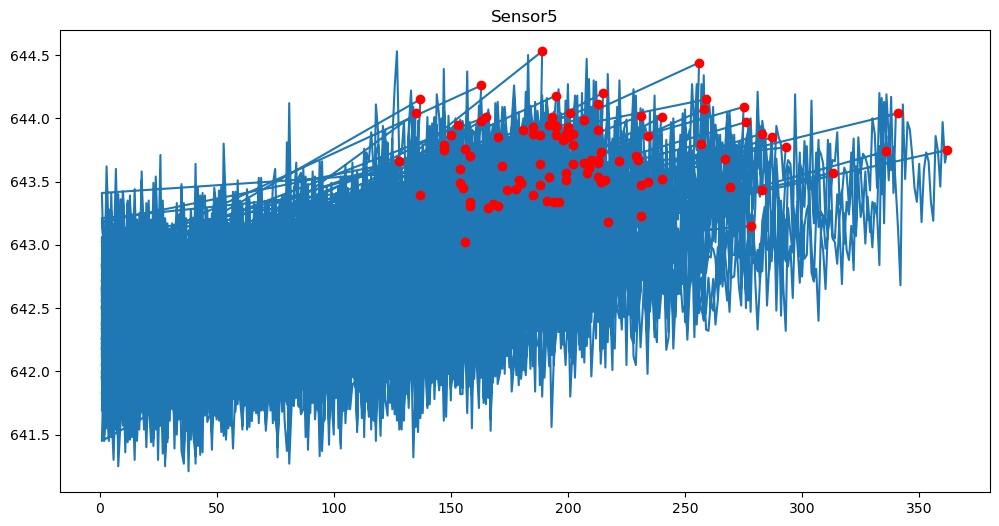

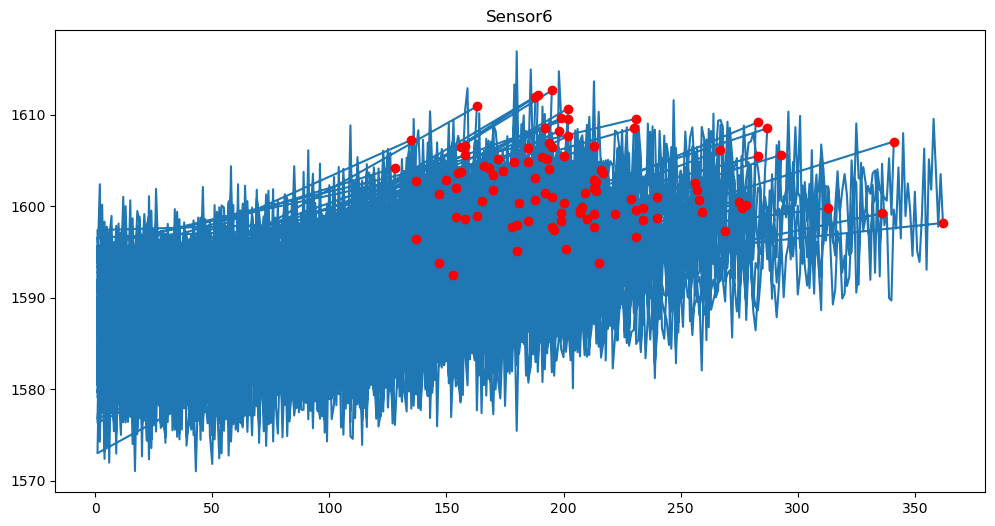

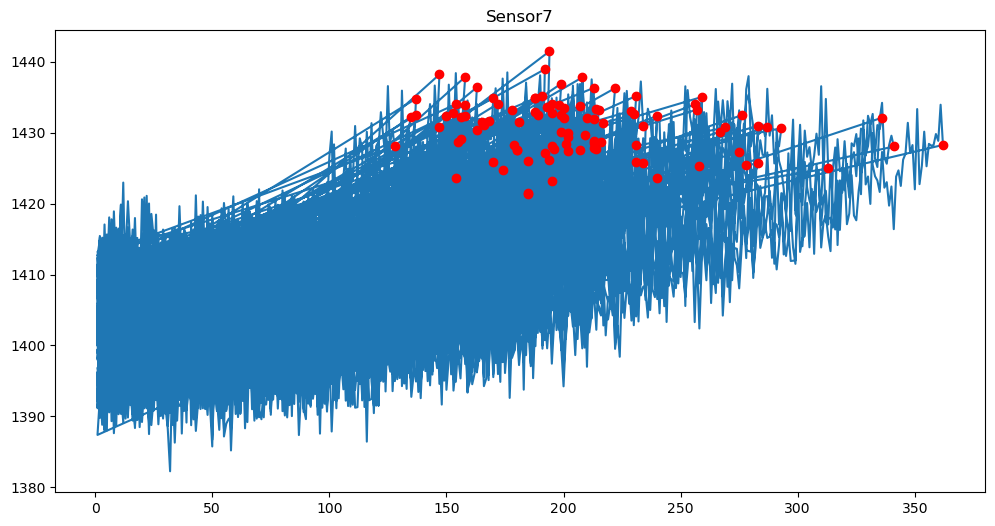

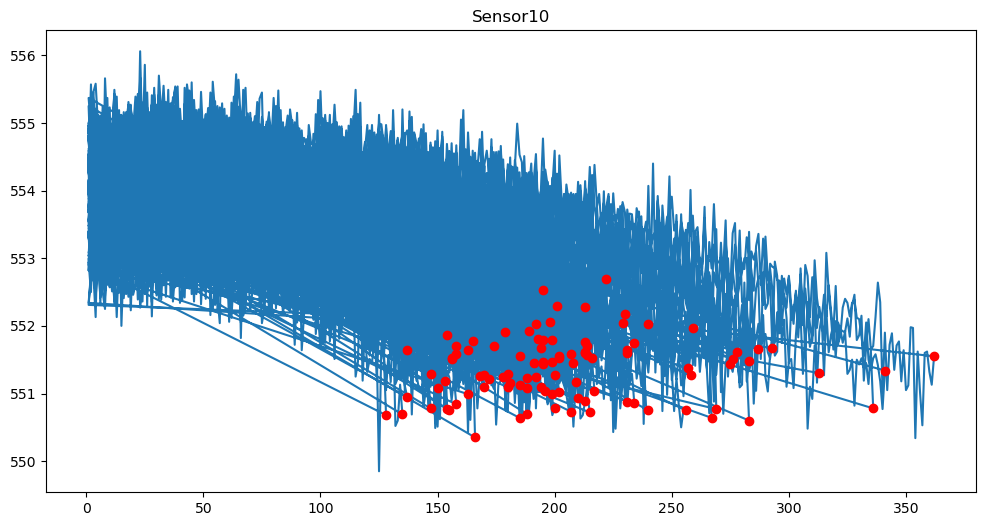

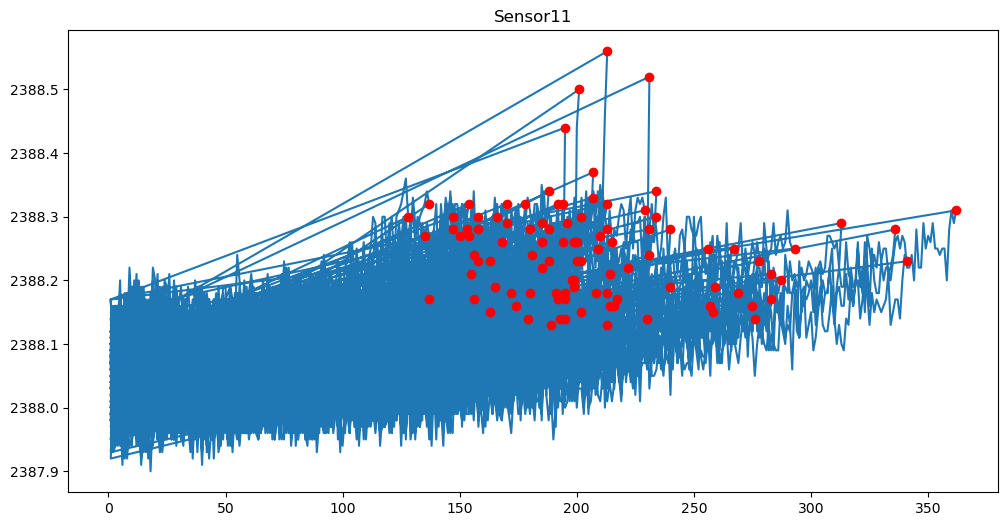

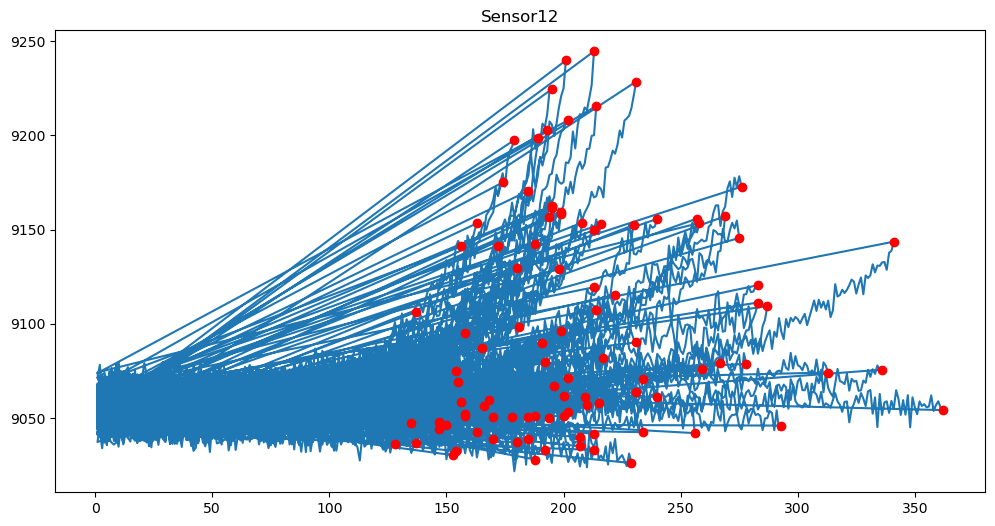

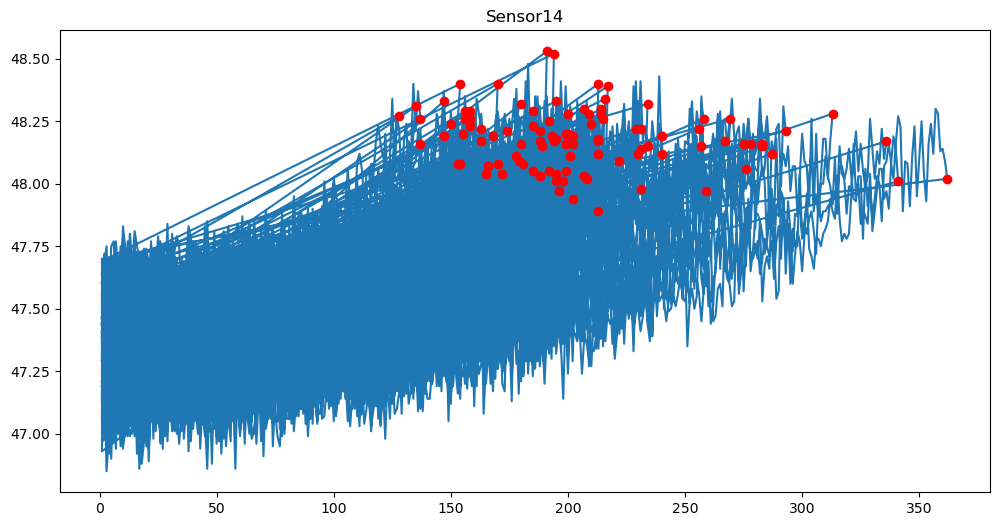

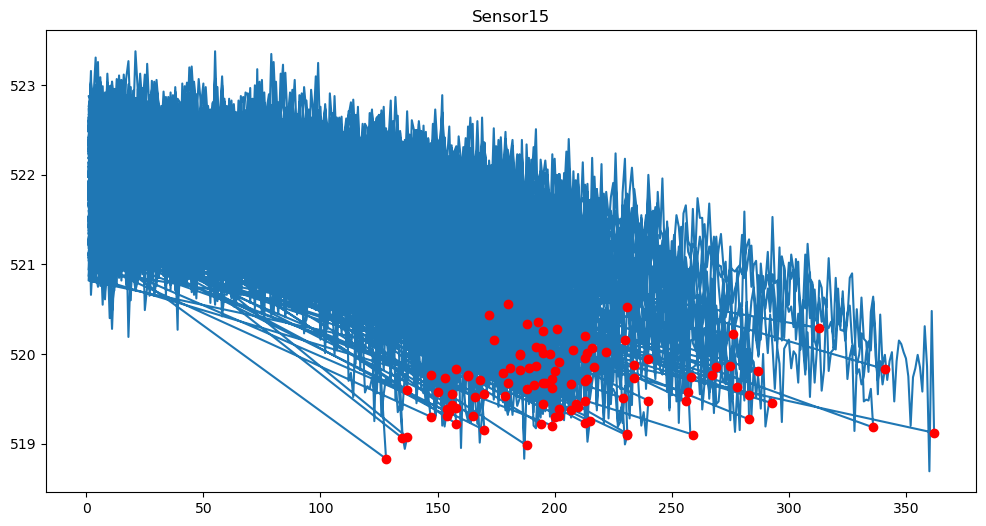

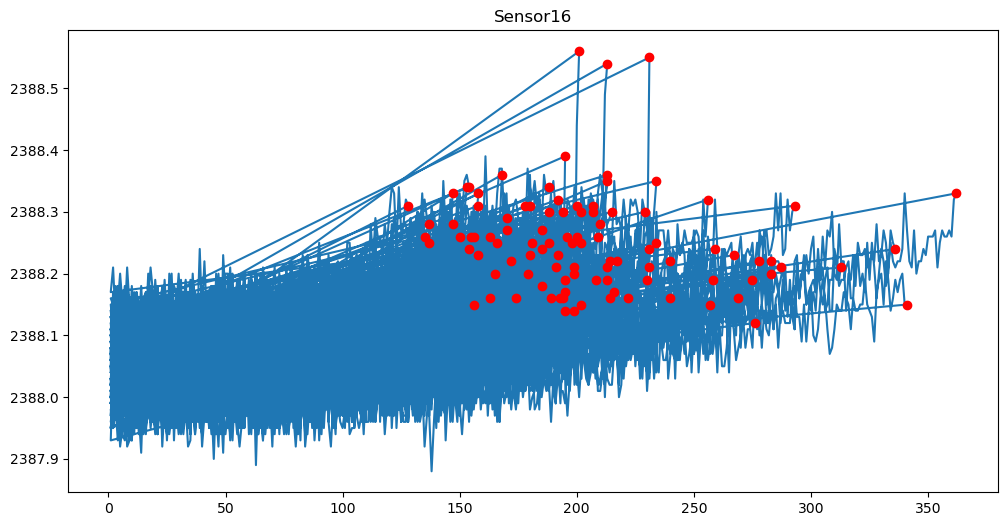

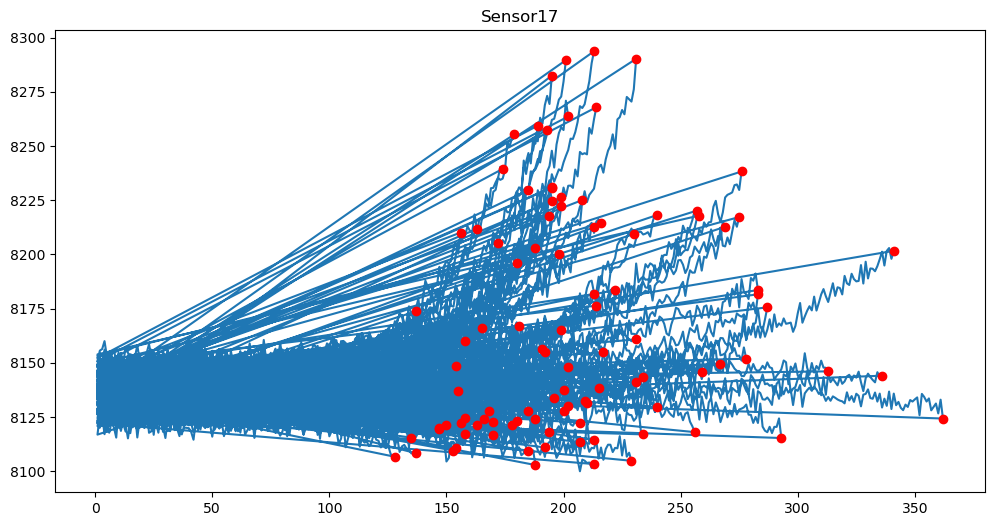

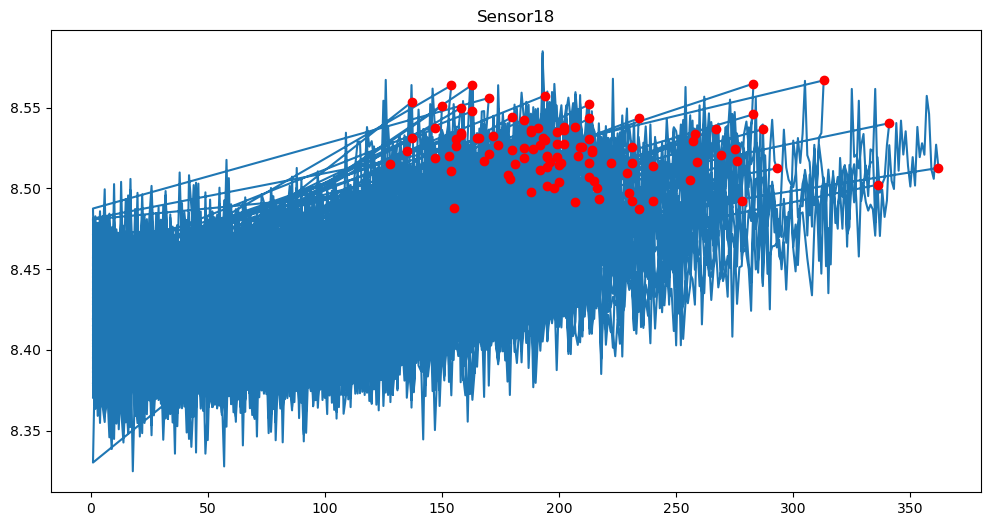

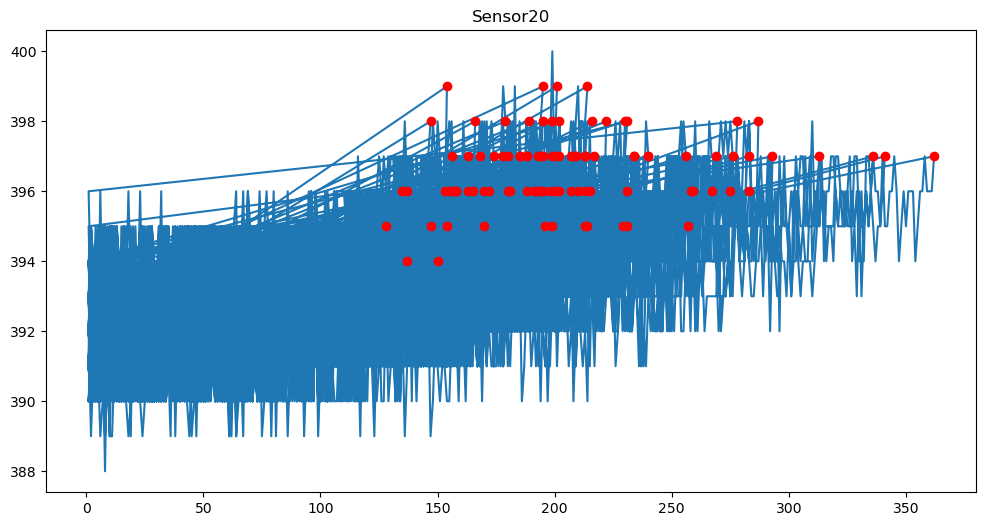

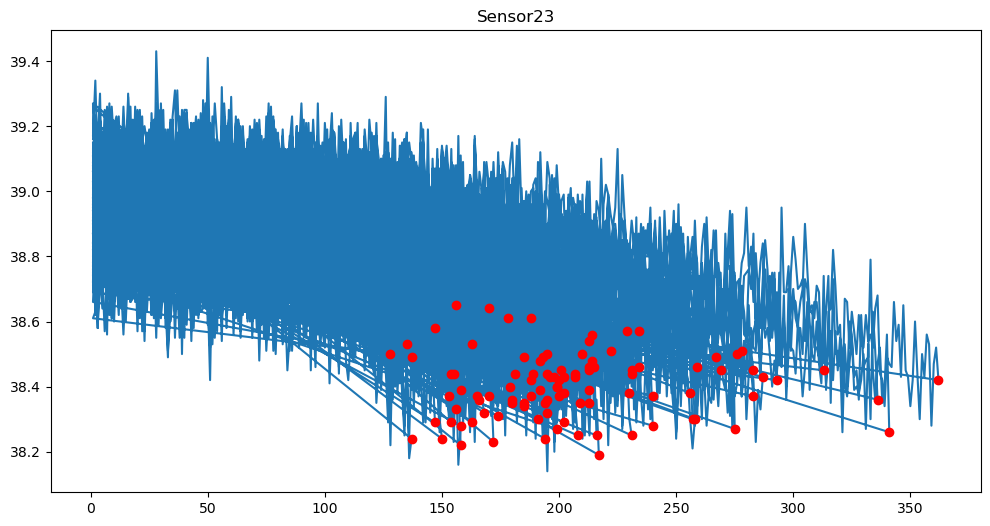

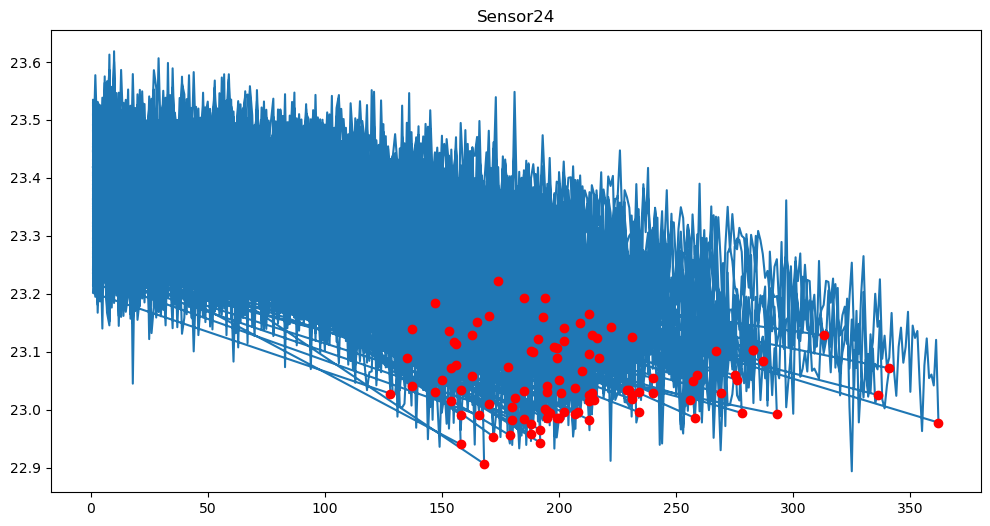

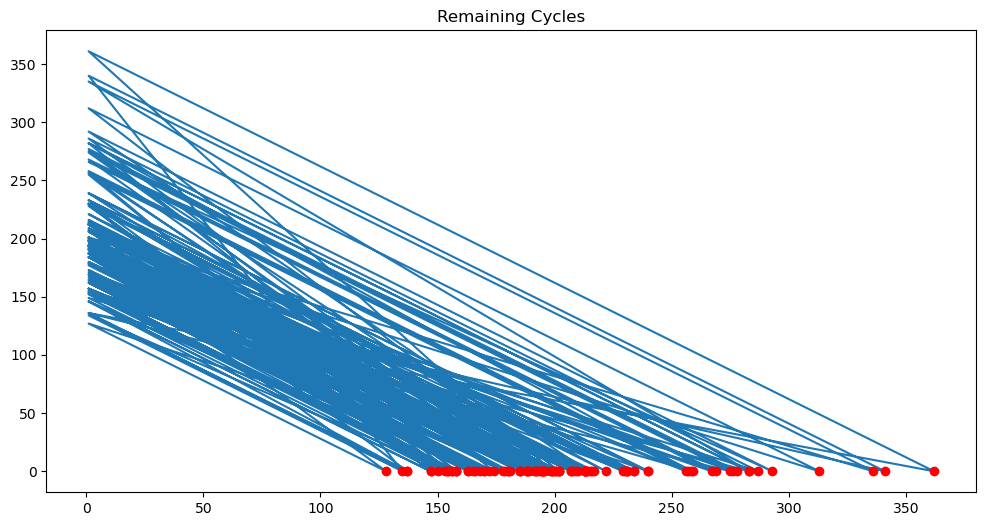

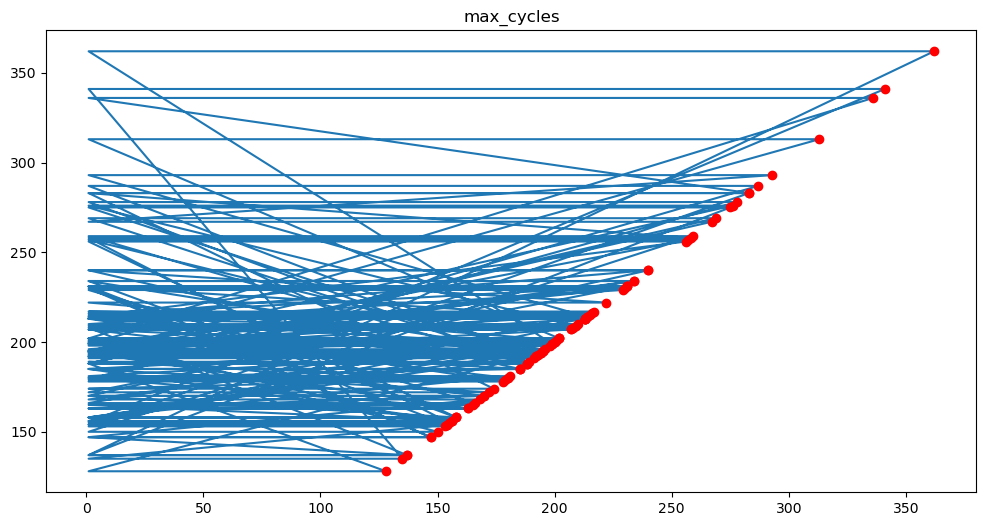

In [117]:
max_pt = list(df[['Engine', 'Cycles']].groupby('Engine').idxmax()['Cycles'])
min_pt = list(df[['Engine', 'Cycles']].groupby('Engine').idxmin()['Cycles'])

max_df = df.loc[max_pt]
min_df = df.loc[min_pt]
cols = list(df.columns)
for i in range(2,len(cols)-1):
    plt.figure(figsize=(12,6))
    plt.plot(df['Cycles'], df.iloc[:,i], zorder = 1)
    plt.scatter(max_df['Cycles'], max_df.iloc[:,i], color='r', zorder=2) #Sensor reading at max cycle of each engine
    
    #plt.scatter(min_df['Cycles'], min_df.iloc[:,i], color='g') #Sensor reading at first cycle of each engine
    #plt.set_xlabel('Cycles')
    plt.title(cols[i])

# Sensor Data comparison between Engines

In [84]:
skew_df = df.groupby('Engine').skew(axis=0)
skew_df['max_cycles'] = df[['Engine', 'Cycles']].groupby('Engine').max()
skew_df.reset_index(inplace=True)


(array([33., 50., 13.,  4.]),
 array([128. , 186.5, 245. , 303.5, 362. ]),
 <BarContainer object of 4 artists>)

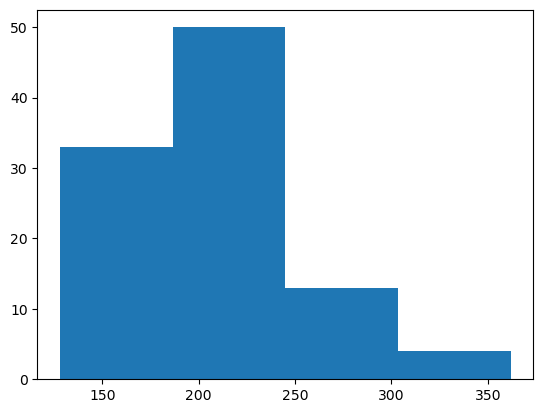

In [87]:
plt.hist(skew_df['max_cycles'], bins=4)

In [88]:
skew_df['Cycle_cat'] = 0

In [104]:
skew_df.loc[(skew_df['max_cycles'] >190) & (skew_df['max_cycles']<245), 'Cycle_cat'] = 1
skew_df.loc[(skew_df['max_cycles'] >=245), 'Cycle_cat'] = 2

In [105]:
skew_df['Cycle_cat'].unique()

array([1, 2, 0], dtype=int64)

(array([18.,  0., 29.,  0.,  0.,  4.,  0., 26.,  0., 23.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

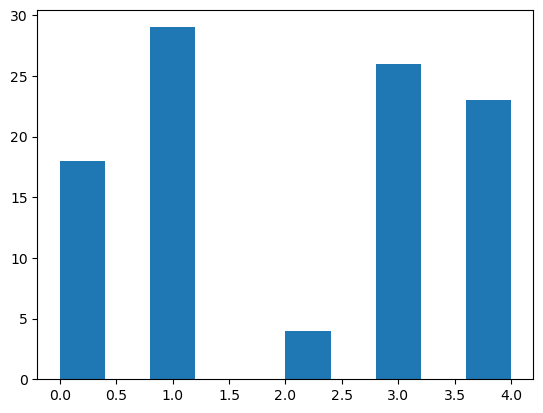

In [108]:
kmean = models[3][0]
skew_df['labels'] = kmean.labels_
plt.hist(skew_df['labels'])

In [112]:
clust_df = skew_df[['Engine', 'max_cycles', 'Cycle_cat']]

In [114]:
df = df.merge(clust_df, on = 'Engine', how='left')

# Cluster Engines

In [54]:
# from sklearn import preprocessing
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [49]:
# scaled_df = df.copy()
# col_list = df.columns
# for col_ind in range(2, len(col_list)-1): 
#     scaled_df[col_list[col_ind]] = (scaled_df[col_list[col_ind]] - scaled_df[col_list[col_ind]].min()) / (scaled_df[col_list[col_ind]].max() - scaled_df[col_list[col_ind]].min())     
# scaled_df.describe().T

In [55]:
# scores = []
# sse = {}
# c_score = []
# xNorm = clust_df
# for k in range(2,10):
#     kmean = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(xNorm)
#     score = silhouette_score(xNorm, kmean.labels_, metric = 'euclidean')
#     models.append([col_list[i+1], kmean, score])
#     scores.append(score)
#     sse[k] = kmean.inertia_
#     #c_score.append( calinski_harabasz_score(xNorm, kmean.labels_))

ValueError: setting an array element with a sequence.